In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import tensorflow.keras.backend as K
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import glob
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/Users/M S I/Desktop/iot/IoT Network Intrusion Dataset.csv')  

# Example of converting text labels to binary values
df['Label'] = df['Label'].map({'Normal': 1, 'Anomaly': -1})



# Normal_df = df[df['Label'] == 1]
# # Normal_df = df[df['Label'] == 'Normal']

# Normal_df.to_csv('normal.csv', index=False)



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [5]:
dataset = df

In [6]:
dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,-1,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,-1,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,-1,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,-1,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,-1,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,-1,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,-1,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,-1,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,1,Normal,Normal


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [8]:
import ipaddress
import pandas as pd

# Assuming dataset is your dataframe

# Convert IPs to integers
dataset['Src_IP'] = dataset['Src_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
dataset['Dst_IP'] = dataset['Dst_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,3232235533,10000,3232235536,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,-1,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,3735073668,2179,3232235533,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,-1,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,3232235536,52727,3232235533,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,-1,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,3232235536,52964,3232235533,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,-1,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,3232235521,36763,4026531834,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,-1,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,3232235544,56112,3529090138,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,-1,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,3733171188,4570,3232235533,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,-1,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,3232235536,52739,3232235533,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,-1,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,3232235533,9020,3232235536,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,1,Normal,Normal


In [9]:
columns_to_drop = [
                    'Flow_ID',
                    'Timestamp',
                    # 'Label',
                   'Cat',
                   'Sub_Cat',
]
dataset = dataset.drop(columns=columns_to_drop)

In [10]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
# Check for missing values
missing_values = dataset.isnull().sum()

# Check for duplicate rows
duplicates = dataset.duplicated().sum()

missing_values, duplicates

# Check for duplicate rows
duplicates = dataset[dataset.duplicated()]

#Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

# Remove duplicate rows
dataset = dataset.drop_duplicates()


Duplicate Rows:
            Src_IP  Src_Port      Dst_IP  Dst_Port  Protocol  Flow_Duration  \
65      1752598231       443  3232235544     43238         6            118   
215     1752598231       443  3232235544     43238         6            184   
323     1752598231       443  3232235544     43238         6            185   
335     1749734842       443  3232235544     51875         6            117   
350     1749734842       443  3232235544     51875         6            112   
...            ...       ...         ...       ...       ...            ...   
625774  1752598231       443  3232235544     43238         6            155   
625775  3232235544     37557  3743906751       443         6             75   
625777  3232235536     56266  3232235533      9020         6            116   
625780  3232235536     52739  3232235533      9020         6             77   
625782  3232235533     10000  3232235536     10101        17            198   

        Tot_Fwd_Pkts  Tot_Bwd_Pkts 

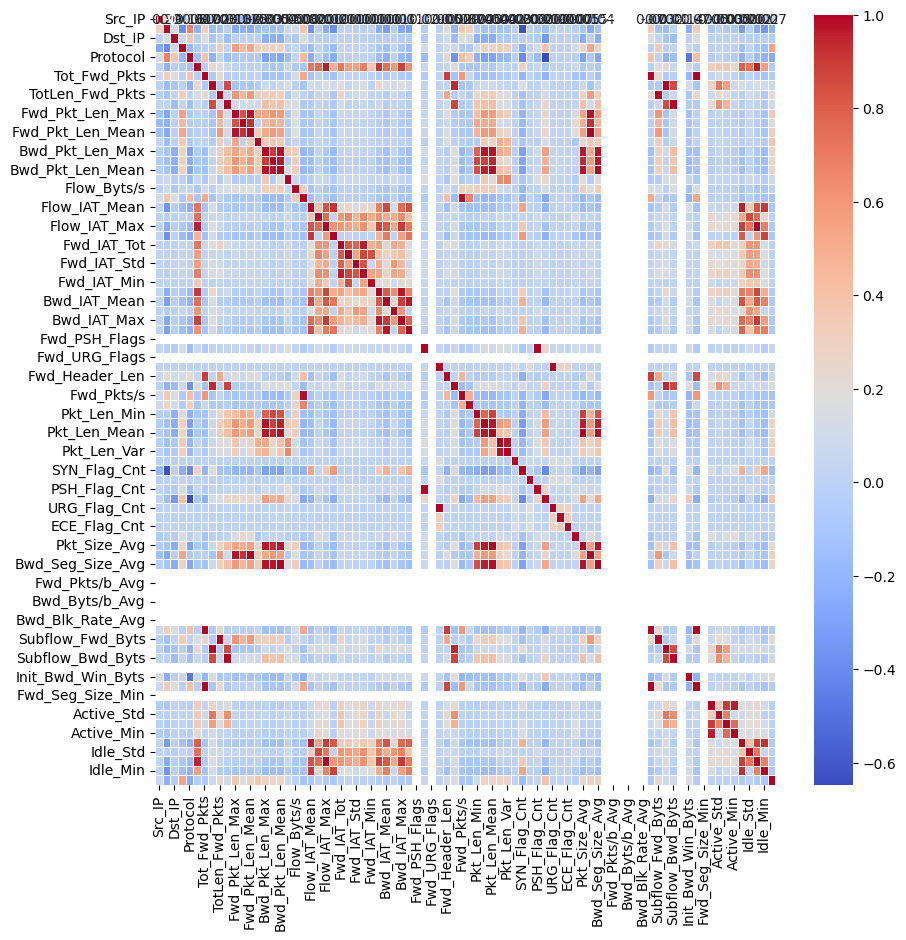

In [12]:
#plotting correlational matrix heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f')
plt.show()

In [13]:
columns_to_drop = [
                    'Flow_IAT_Mean',
                    'Flow_IAT_Std',
                    'Flow_IAT_Max',
                    'Flow_IAT_Min',
                    'Fwd_IAT_Tot',
                    'Fwd_IAT_Mean',
                    'Fwd_IAT_Max',
                    'Fwd_IAT_Min',
                    'Bwd_IAT_Tot',
                    'Bwd_IAT_Mean',
                    'Bwd_IAT_Max',
                    'Bwd_IAT_Min',
                     'Fwd_Pkt_Len_Max',
                     'Fwd_Pkt_Len_Min',
                     'Fwd_Pkt_Len_Mean',
                     'Fwd_Pkt_Len_Std',
                     'Bwd_Pkt_Len_Max',
                     'Bwd_Pkt_Len_Min',
                     'Bwd_Pkt_Len_Mean',
                     'Bwd_Pkt_Len_Std',
                     'Pkt_Len_Mean',
                    'Pkt_Len_Var',
                    'Idle_Mean',
                     'Idle_Std',
                     'Idle_Max',
                     'Idle_Min',
                     'Subflow_Fwd_Pkts',
                 'Subflow_Fwd_Byts',
                 'Subflow_Bwd_Pkts',
                 'Subflow_Bwd_Byts',
                    'Fwd_Header_Len',
                'Bwd_Header_Len',
                'Fwd_PSH_Flags',
                'Bwd_PSH_Flags',
                'Fwd_URG_Flags',
                'Fwd_Byts/b_Avg',
                 'Fwd_Pkts/b_Avg',
                 'Fwd_Blk_Rate_Avg',
                 'Bwd_Byts/b_Avg',
                 'Bwd_Pkts/b_Avg',
                 'Bwd_Blk_Rate_Avg',
                 'Init_Fwd_Win_Byts',
                 'Init_Bwd_Win_Byts',
                    'Fwd_Seg_Size_Min',
                 'Active_Mean',
                 'Active_Std',
                 'Active_Max',
                 'Active_Min',
                'Pkt_Size_Avg',
             'Fwd_Seg_Size_Avg',
             'Bwd_Seg_Size_Avg',
             'Fwd_Act_Data_Pkts',
                'Bwd_URG_Flags',
                'ECE_Flag_Cnt',                  
]
dataset = dataset.drop(columns=columns_to_drop)

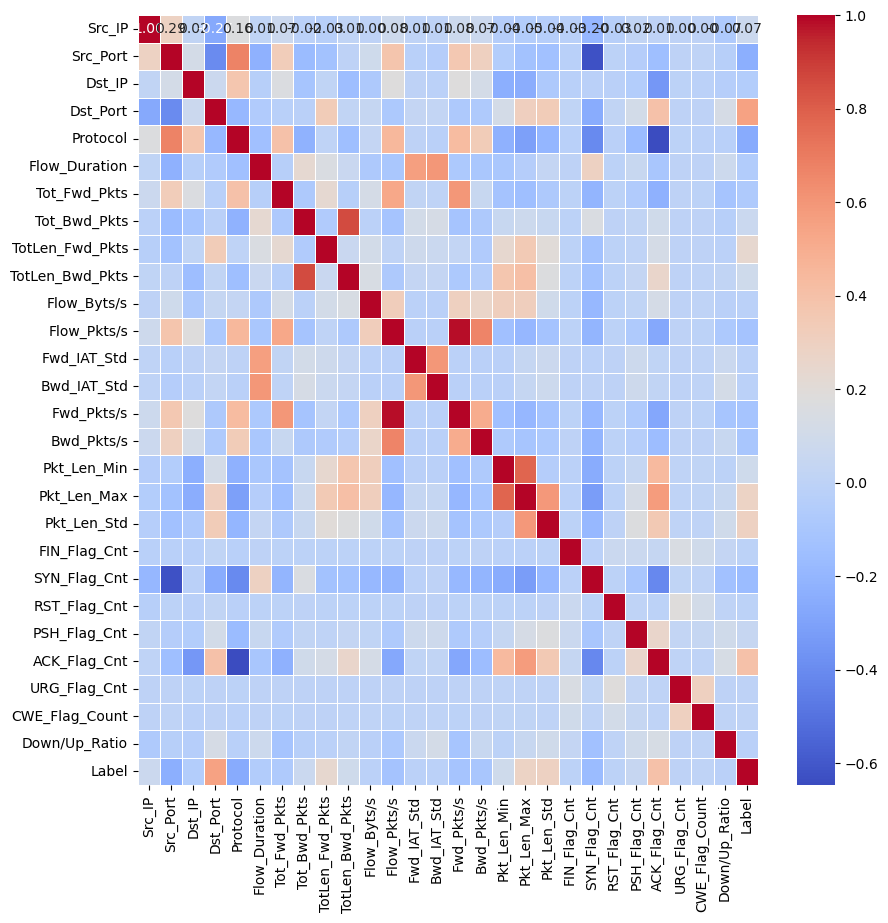

In [14]:
#plotting correlational matrix heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f')
plt.show()

In [15]:
dataset.shape

(279691, 28)

In [16]:
dataset.columns.tolist()

['Src_IP',
 'Src_Port',
 'Dst_IP',
 'Dst_Port',
 'Protocol',
 'Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Fwd_IAT_Std',
 'Bwd_IAT_Std',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Std',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'Down/Up_Ratio',
 'Label']

In [17]:
dataset.shape

(279691, 28)

In [18]:
dataset.dtypes

Src_IP               int64
Src_Port             int64
Dst_IP               int64
Dst_Port             int64
Protocol             int64
Flow_Duration        int64
Tot_Fwd_Pkts         int64
Tot_Bwd_Pkts         int64
TotLen_Fwd_Pkts    float64
TotLen_Bwd_Pkts    float64
Flow_Byts/s        float64
Flow_Pkts/s        float64
Fwd_IAT_Std        float64
Bwd_IAT_Std        float64
Fwd_Pkts/s         float64
Bwd_Pkts/s         float64
Pkt_Len_Min        float64
Pkt_Len_Max        float64
Pkt_Len_Std        float64
FIN_Flag_Cnt         int64
SYN_Flag_Cnt         int64
RST_Flag_Cnt         int64
PSH_Flag_Cnt         int64
ACK_Flag_Cnt         int64
URG_Flag_Cnt         int64
CWE_Flag_Count       int64
Down/Up_Ratio      float64
Label                int64
dtype: object

In [19]:
dataset

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,...,Pkt_Len_Std,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,Down/Up_Ratio,Label
0,3232235533,10000,3232235536,10101,17,75,1,1,982.0,1430.0,...,258.652921,0,0,0,0,0,0,0,1.0,-1
1,3735073668,2179,3232235533,554,6,5310,1,2,0.0,0.0,...,0.000000,0,1,0,0,0,0,0,2.0,-1
2,3232235536,52727,3232235533,9020,6,141,0,3,0.0,2806.0,...,679.000000,0,0,0,0,1,0,0,0.0,-1
3,3232235536,52964,3232235533,9020,6,151,0,2,0.0,2776.0,...,0.000000,0,0,0,0,1,0,0,0.0,-1
4,3232235521,36763,4026531834,1900,17,153,2,1,886.0,420.0,...,15.176737,0,0,0,0,0,0,0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625773,3232235544,60165,3529090138,8899,17,29,5,1,160.0,32.0,...,0.000000,0,0,0,0,0,0,0,0.0,-1
625776,1866042230,8739,3232235544,19604,6,1092,0,2,0.0,0.0,...,0.000000,0,1,0,0,0,0,0,0.0,-1
625778,3232235544,56112,3529090138,8043,17,277,1,1,18.0,18.0,...,0.000000,0,0,0,0,0,0,0,1.0,-1
625779,3733171188,4570,3232235533,554,6,1658,0,2,0.0,0.0,...,0.000000,0,1,0,0,0,0,0,0.0,-1


In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# # Assuming 'dataset' is your DataFrame
# # Initialize the StandardScaler
# standard_scaler = StandardScaler()

# # Fit and transform the data
# dataset = pd.DataFrame(standard_scaler.fit_transform(dataset), columns=dataset.columns)




from sklearn.preprocessing import MinMaxScaler
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
dataset = pd.DataFrame(min_max_scaler.fit_transform(dataset), columns=dataset.columns)

In [21]:
# from sklearn.neighbors import LocalOutlierFactor
# dataset = dataset.dropna()
# lof.fit(dataset)


In [22]:
x= dataset.drop('Label',axis=1)
y= dataset['Label']

In [23]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
# train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]  # Ensure labels match after dropping rows
x_test = x_test.dropna()
y_test = y_test[x_test.index]  # Ensure labels match after dropping rows


In [26]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Number of folds
k = 5  # You can change this based on the size of your dataset

# Set up k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Define parameter grid for LOF (manual search, LOF doesn't support GridSearchCV)
param_grid = {
    'n_neighbors': [10, 20, 30, 50],  # Number of neighbors to use for calculating LOF
    'algorithm': ['brute'],  # Algorithms for nearest neighbors search
    'leaf_size': [10, 20, 30, 40],  # Leaf size for ball_tree or kd_tree
    'contamination': [0.01],  # Proportion of outliers in the data
    'novelty': [True]  # Enable predict method (only available when novelty is True)
}

# Initialize best accuracy and best parameters tracking
best_accuracy = 0
best_params = None
best_model = None

# Manual grid search for LOF
for n_neighbors in param_grid['n_neighbors']:
    for algorithm in param_grid['algorithm']:
        for leaf_size in param_grid['leaf_size']:
            for contamination in param_grid['contamination']:
                # Initialize the Local Outlier Factor model
                lof = LocalOutlierFactor(
                    n_neighbors=n_neighbors,
                    algorithm=algorithm,
                    leaf_size=leaf_size,
                    contamination=contamination,
                    novelty=True  # Enables us to use predict method
                )
                
                # Train the model using k-fold cross-validation
                fold_accuracies = []
                for train_index, val_index in kf.split(x_train):
                    # Use .iloc to select rows by their index
                    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
                    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
                    
                    # Fit the LOF model
                    lof.fit(x_train_fold)
                    
                    # Train predictions and accuracy
                    y_train_pred = lof.predict(x_train_fold)
                    y_train_pred = np.where(y_train_pred == 1, 0, 1)  # Convert 1 (normal) -> 0, -1 (anomaly) -> 1
                    fold_accuracy = accuracy_score(y_train_fold, y_train_pred)
                    fold_accuracies.append(fold_accuracy)
                
                # Average accuracy over folds
                avg_accuracy = np.mean(fold_accuracies)
                
                if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_params = {
                        'n_neighbors': n_neighbors,
                        'algorithm': algorithm,
                        'leaf_size': leaf_size,
                        'contamination': contamination
                    }
                    best_model = lof

# Display the best parameters found by manual search
print("Best parameters found by manual search:", best_params)

# Train the best model on the entire training dataset
best_model.fit(x_train)

# Train predictions and accuracy
y_train_pred = best_model.predict(x_train)
y_train_pred = np.where(y_train_pred == 1, 0, 1)  # Convert 1 (normal) -> 0, -1 (anomaly) -> 1
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}")

# Test predictions and accuracy
y_test_pred = best_model.predict(x_test)
y_test_pred = np.where(y_test_pred == 1, 0, 1)  # Convert 1 (normal) -> 0, -1 (anomaly) -> 1
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Best parameters found by manual search: {'n_neighbors': 20, 'algorithm': 'brute', 'leaf_size': 10, 'contamination': 0.01}
Train Accuracy: 89.55
Test Accuracy: 89.54
Confusion Matrix:
[[49974   469]
 [ 5383    97]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     50443
         1.0       0.17      0.02      0.03      5480

    accuracy                           0.90     55923
   macro avg       0.54      0.50      0.49     55923
weighted avg       0.83      0.90      0.86     55923



In [27]:
# After fitting the best model on the entire training dataset
best_model.fit(x_train)

# Train predictions and accuracy
y_train_pred = best_model.predict(x_train)
y_train_pred = np.where(y_train_pred == 1, 0, 1)  # Convert 1 (normal) -> 0, -1 (anomaly) -> 1

# Calculate the number of anomalies in training data
train_anomalies = np.sum(y_train_pred == 1)
print(f"Number of anomalies in training data: {train_anomalies}")

# Train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}")

# Test predictions and accuracy
y_test_pred = best_model.predict(x_test)
y_test_pred = np.where(y_test_pred == 1, 0, 1)  # Convert 1 (normal) -> 0, -1 (anomaly) -> 1

# Calculate the number of anomalies in test data
test_anomalies = np.sum(y_test_pred == 1)
print(f"Number of anomalies in test data: {test_anomalies}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Number of anomalies in training data: 2060
Train Accuracy: 89.55
Number of anomalies in test data: 566
Test Accuracy: 89.54
Confusion Matrix:
[[49974   469]
 [ 5383    97]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     50443
         1.0       0.17      0.02      0.03      5480

    accuracy                           0.90     55923
   macro avg       0.54      0.50      0.49     55923
weighted avg       0.83      0.90      0.86     55923



In [ ]:
# Train predictions and accuracy
y_train_pred = best_model.predict(x_train)
y_train_pred = np.where(y_train_pred == 1, 0, 1)  # Convert 1 (normal) -> 0, -1 (anomaly) -> 1

# Count the number of anomalies in the training set
num_train_anomalies = np.sum(y_train_pred == 1)
print(f"Number of anomalies in training set: {num_train_anomalies}")

# Test predictions and accuracy
y_test_pred = best_model.predict(x_test)
y_test_pred = np.where(y_test_pred == 1, 0, 1)  # Convert 1 (normal) -> 0, -1 (anomaly) -> 1

# Count the number of anomalies in the test set
num_test_anomalies = np.sum(y_test_pred == 1)
print(f"Number of anomalies in test set: {num_test_anomalies}")


In [ ]:
import joblib

# Save the model to an .h5 file (using .h5 extension for convenience, but it's not an actual HDF5 format)
joblib.dump(best_model, 'local outlier factor.h5')


In [ ]:
print(np.unique(y_train))  # Should return [1]
print(np.unique(y_test))   # Should return [1, -1] for both normal and anomalies


In [ ]:
y_train

In [ ]:
# Save the model
import joblib
joblib.dump(best_oc_svm, 'one_class_svm_model.pkl')

In [ ]:

Anomaly_df = df[df['Label'] == -1]

Anomaly_df.to_csv('Anomaly.csv', index=False)



In [ ]:
df_a = Anomaly_df

In [ ]:
df_a.info()

In [ ]:
attack_df = df_a
attack_df

In [ ]:
# Check for NaN or infinite values
print(attack_df.isnull().sum())  # Check for NaN values
print(np.isinf(attack_df).sum())  # Check for infinite values


In [ ]:
attack_df = attack_df.dropna()  # Remove rows with NaN values
attack_df = attack_df[~np.isinf(attack_df).any(axis=1)]  # Remove rows with infinite values


In [ ]:
attack_df

In [ ]:
columns_to_drop = [
                    'Flow_ID',
                    'Timestamp',
                    'Label',
                   'Cat',
                   'Sub_Cat',
                    'Flow_IAT_Mean',
                    'Flow_IAT_Std',
                    'Flow_IAT_Max',
                    'Flow_IAT_Min',
                    'Fwd_IAT_Tot',
                    'Fwd_IAT_Mean',
                    'Fwd_IAT_Max',
                    'Fwd_IAT_Min',
                    'Bwd_IAT_Tot',
                    'Bwd_IAT_Mean',
                    'Bwd_IAT_Max',
                    'Bwd_IAT_Min',
]
attack_df = attack_df.drop(columns=columns_to_drop)

In [ ]:
import ipaddress
import pandas as pd

# Assuming attack_df is your dataframe

# Convert IPs to integers
attack_df['Src_IP'] = attack_df['Src_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
attack_df['Dst_IP'] = attack_df['Dst_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
attack_df

In [ ]:
attack_df.info()

In [ ]:
attack_df

In [ ]:
y_test_ = best_oc_svm.predict(attack_df)